In [57]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deborahsani","key":"0ecb047750f743bcadcc9f567cde9efc"}'}

In [58]:
import os
import shutil

# Create the Kaggle folder
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the folder
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions
os.chmod('/root/.kaggle/kaggle.json', 600)

In [59]:
!pip install kaggle

In [60]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mostafaeltalawy/brest-cancer")

In [61]:
!kaggle datasets download -d mostafaeltalawy/brest-cancer

Dataset URL: https://www.kaggle.com/datasets/mostafaeltalawy/brest-cancer
License(s): unknown
brest-cancer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [62]:
import zipfile

# Extract the dataset
with zipfile.ZipFile('brest-cancer.zip', 'r') as zip_ref:
    zip_ref.extractall('brest_cancer_dataset')

In [63]:
import os

# List files in the dataset directory
print(os.listdir('brest_cancer_dataset'))

['Breast Cancer DataSet']


In [64]:
train_dir = '/content/brest_cancer_dataset/Breast Cancer DataSet/Train'
val_dir = '/content/brest_cancer_dataset/Breast Cancer DataSet/valid'
test_dir = '/content/brest_cancer_dataset/Breast Cancer DataSet/Test'


In [65]:
import os
import numpy as np


# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

import tensorflow as tf
import keras


In [66]:
# Create ImageDataGenerators without augmentation
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),  # Resize images
    batch_size=32,
    class_mode='binary'      # Binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False            # Keep the order for evaluation
)



Found 808 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Found 129 images belonging to 2 classes.


In [67]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),
    # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
    tf.keras.layers.Rescaling(1./255),
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])





# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Suitable for binary classification
    metrics=['accuracy']
)


In [68]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,471,681 (13.24 MB)

 Trainable params: 3,471,681 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [70]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 228s 8s/step - accuracy: 0.5191 - loss: 0.8282 - val_accuracy: 0.7619 - val_loss: 0.6017
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 258s 8s/step - accuracy: 0.6933 - loss: 0.6087 - val_accuracy: 0.9259 - val_loss: 0.5272
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 230s 9s/step - accuracy: 0.7281 - loss: 0.5848 - val_accuracy: 0.7831 - val_loss: 0.5120
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 257s 9s/step - accuracy: 0.7917 - loss: 0.5020 - val_accuracy: 0.9153 - val_loss: 0.2177
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.8169 - loss: 0.4075 - val_accuracy: 0.8836 - val_loss: 0.2818
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 258s 9s/step - accuracy: 0.8159 - loss: 0.4228 - val_accuracy: 0.8730 - val_loss: 0.2997
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.7988 - loss: 0.4292 - val_accuracy: 0.8783 - val_loss: 0.2571
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.8064 - loss: 0.4272 - val_accuracy: 0.9524 - v

In [71]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9153 - loss: 0.3309
Test Accuracy: 87.60%


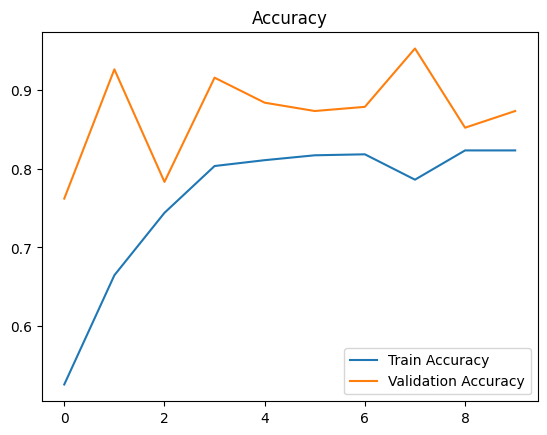

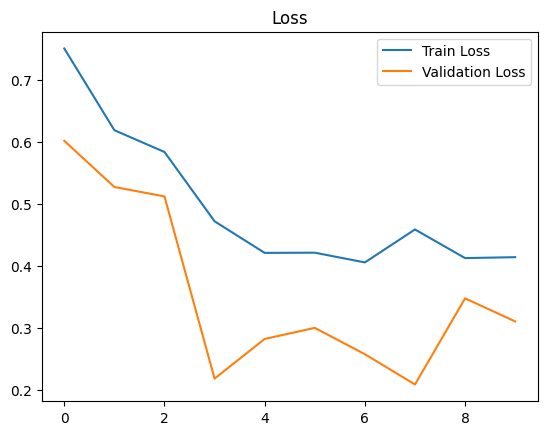

In [72]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [73]:
import seaborn as sns

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
              precision    recall  f1-score   support

      Benign       0.83      0.94      0.88        64
   Malignant       0.93      0.82      0.87        65

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129



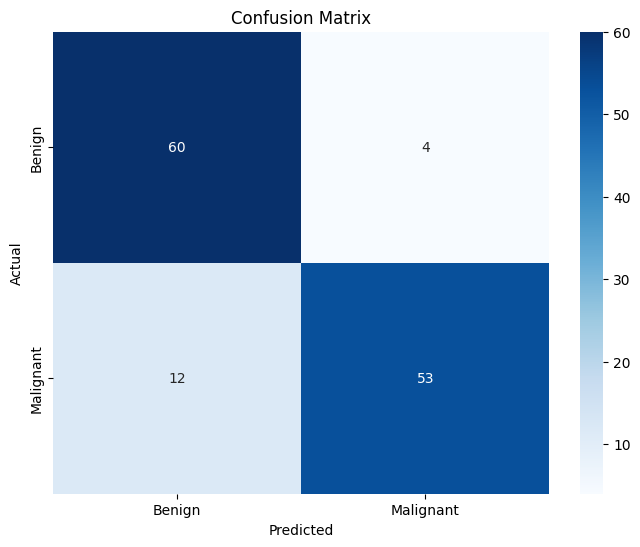

In [74]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = (model.predict(test_generator) > 0.5).astype("int32")
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
